In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import os
from os import listdir
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
import pathlib

data_dir = pathlib.Path("Resources/images/training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['flip' 'notflip']


In [3]:
# let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    
    target_folder =target_dir +target_class

  # get a random image path
    random_image =random.sample(os.listdir(target_folder),1)
  # read  in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")
    return img

Image shape: (1920, 1080, 3)


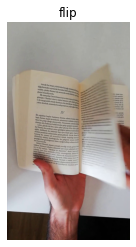

In [4]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "flip")

Image shape: (1920, 1080, 3)


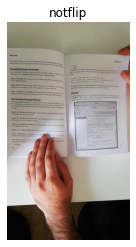

In [5]:
# View a random image from the training dataset
img =view_random_image(target_dir = "Resources/images/training/",
                       target_class = "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


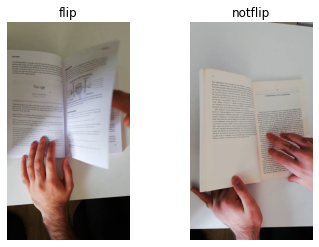

In [6]:
# visualize images
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/training/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/training/", "notflip")

Image shape: (1920, 1080, 3)
Image shape: (1920, 1080, 3)


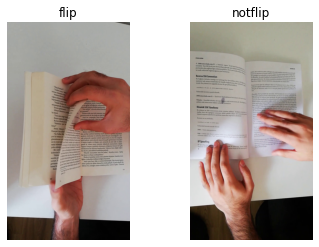

In [7]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
flip_img = view_random_image("Resources/images/testing/", "flip")
plt.subplot(1,2,2)
notflip =view_random_image("Resources/images/testing/", "notflip")

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(get all of the pixel values between 0 & 1 , also called normalization/scaling )
train_datagen  =ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir="Resources/images/training"
test_dir = "Resources/images/testing"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding="valid"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation="sigmoid")
                                                            
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1  = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data = valid_data,
                         validation_steps=len(valid_data))

Found 2392 images belonging to 2 classes.
Found 595 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 19 steps
Epoch 1/5
75/75 [==============================] - 151s 2s/step - loss: 0.5985 - accuracy: 0.6589 - val_loss: 0.4877 - val_accuracy: 0.7008
Epoch 2/5
75/75 [==============================] - 125s 2s/step - loss: 0.2516 - accuracy: 0.9072 - val_loss: 0.1566 - val_accuracy: 0.9445
Epoch 3/5
75/75 [==============================] - 123s 2s/step - loss: 0.1919 - accuracy: 0.9160 - val_loss: 0.1763 - val_accuracy: 0.9328
Epoch 4/5
75/75 [==============================] - 120s 2s/step - loss: 0.0869 - accuracy: 0.9753 - val_loss: 0.0951 - val_accuracy: 0.9681
Epoch 5/5
75/75 [==============================] - 124s 2s/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0642 - val_accuracy: 0.9748


In [9]:
model_1.predict(valid_data)

array([[8.28627124e-03],
       [6.87010884e-02],
       [9.96188700e-01],
       [9.96991396e-01],
       [5.76221719e-02],
       [9.68842566e-01],
       [1.02599040e-06],
       [1.22415402e-03],
       [9.99833107e-01],
       [9.99179423e-01],
       [9.99647498e-01],
       [1.16257267e-02],
       [3.97473499e-02],
       [1.74986544e-05],
       [9.74057436e-01],
       [5.64665301e-04],
       [7.48417631e-04],
       [7.47788310e-01],
       [1.01943675e-03],
       [9.98917103e-01],
       [1.01085017e-02],
       [9.98428762e-01],
       [3.10191675e-03],
       [3.64869130e-08],
       [1.69618943e-06],
       [9.99999285e-01],
       [1.84091721e-02],
       [9.99170423e-01],
       [3.24050826e-03],
       [7.37067103e-01],
       [9.99111950e-01],
       [2.75558908e-03],
       [2.50421967e-02],
       [4.30650653e-05],
       [9.97627318e-01],
       [8.33157480e-01],
       [1.34679271e-06],
       [9.99671340e-01],
       [9.82487500e-01],
       [9.88574028e-01],


In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [12]:
model_1.evaluate(valid_data)

  ...
    to  
  ['...']
19/19 [==============================] - 21s 1s/step - loss: 0.0642 - accuracy: 0.9748


[0.06417404458318886, 0.9747899]

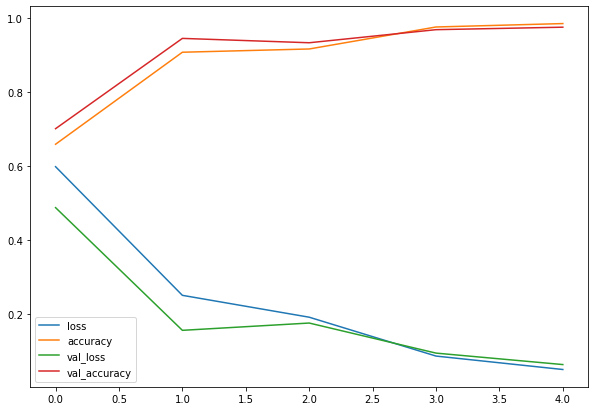

In [13]:

pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [14]:
def plot_loss_curves(history):
    
    """
    Returns separte loss curves for training and validation metrics.
    """
    loss= history.history["loss"]
    val_loss =history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs =range(len(history.history["loss"]))

  # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title('loss')
    plt.xlabel("epochs")
    plt.legend()

  # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

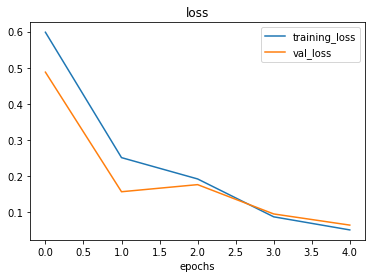

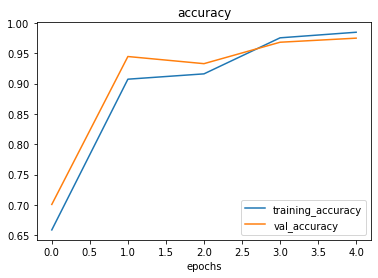

In [15]:
plot_loss_curves(history_1)

In [16]:
y_true = train_data.classes
y_true = y_true == 1
Y_pred = model_1.predict(train_data, steps = len(train_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [18]:
y_true

array([False, False, False, ...,  True,  True,  True])

In [19]:
y_true == 1

array([False, False, False, ...,  True,  True,  True])

In [20]:
y_pred

array([False, False,  True, ..., False,  True, False])

In [21]:
cm = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

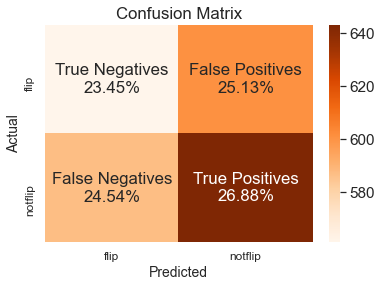

In [22]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [23]:
y_true = valid_data.classes
y_true = y_true == 1
Y_pred = model_1.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [24]:
cm_v = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_v.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_v.flatten()/np.sum(cm_v)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

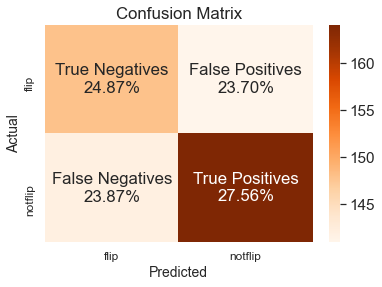

In [25]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_v, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [26]:
accuracy.update_state(y_true, y_pred)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=595.0>

In [27]:
accuracy.result().numpy()

0.5243698

In [28]:
 ## Summary Statistics
TN, FP, FN, TP = cm_v.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm_v) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

[Summary Statistics]
Accuracy = 52.44% | Precision = 53.77% | Recall = 53.59% | Specificity = 51.21% | F1 Score = 53.68%


In [29]:
# set random seed
tf.random.seed = 42

# creata a model to replicate the Tensorflow Playground Model
model_2  = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape =(224,224,3)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 19 steps
Epoch 1/5
75/75 [==============================] - 104s 1s/step - loss: 0.6931 - accuracy: 0.5159 - val_loss: 0.6930 - val_accuracy: 0.5143
Epoch 2/5
75/75 [==============================] - 101s 1s/step - loss: 0.6930 - accuracy: 0.5142 - val_loss: 0.6930 - val_accuracy: 0.5143
Epoch 3/5
75/75 [==============================] - 105s 1s/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6929 - val_accuracy: 0.5143
Epoch 4/5
75/75 [==============================] - 100s 1s/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5143
Epoch 5/5
75/75 [==============================] - 100s 1s/step - loss: 0.6928 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5143


In [30]:
y_true = valid_data.classes
Y_pred = model_2.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [31]:
cm_2 = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_2.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_2.flatten()/np.sum(cm_2)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

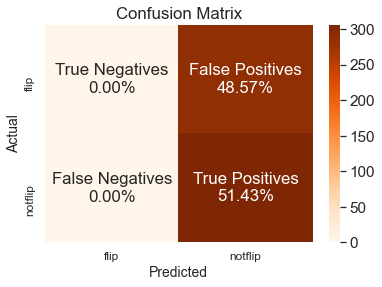

In [32]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_2, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [33]:
## Improving model_1

#set the random seed 
tf.random.set_seed(42)

# creata model
model_3  =tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

# fit the model
history_3 =model_3.fit(train_data, 
                       epochs=5, 
                       steps_per_epoch =len(train_data),
                       validation_data=valid_data,
                       validation_steps =len(valid_data) )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 19 steps
Epoch 1/5
75/75 [==============================] - 104s 1s/step - loss: 2.9138 - accuracy: 0.5322 - val_loss: 0.6991 - val_accuracy: 0.5966
Epoch 2/5
75/75 [==============================] - 108s 1s/step - loss: 0.8553 - accuracy: 0.5539 - val_loss: 0.5911 - val_accuracy: 0.6924
Epoch 3/5
75/75 [==============================] - 102s 1s/step - loss: 0.6823 - accuracy: 0.6317 - val_loss: 0.4905 - val_accuracy: 0.8555
Epoch 4/5
75/75 [==============================] - 101s 1s/step - loss: 0.5399 - accuracy: 0.7232 - val_loss: 0.4066 - val_accuracy: 0.8538
Epoch 5/5
75/75 [==============================] - 102s 1s/step - loss: 0.4659 - accuracy: 0.7726 - val_loss: 0.3340 - val_accuracy: 0.8908


In [34]:
y_true = valid_data.classes
Y_pred = model_3.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [35]:
cm_3 = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_3.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_3.flatten()/np.sum(cm_3)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

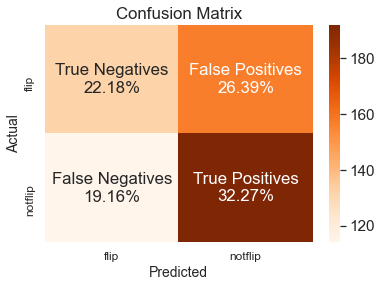

In [36]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_3, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [37]:
from tensorflow.keras.optimizers import Adam
# create the model
model_4 =Sequential([
                   Conv2D(filters=10,
                          kernel_size = (3,3),
                          strides =(1,1),
                          padding ="valid",
                          activation="relu",
                          input_shape = (224,224,3)),  # input layer
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                       Flatten(),
                     Dense(1, activation="sigmoid")    # output layer 
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# fit the model
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps = len(valid_data))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 19 steps
Epoch 1/5
75/75 [==============================] - 135s 2s/step - loss: 0.8270 - accuracy: 0.7433 - val_loss: 0.3193 - val_accuracy: 0.8639
Epoch 2/5
75/75 [==============================] - 127s 2s/step - loss: 0.1530 - accuracy: 0.9423 - val_loss: 0.0634 - val_accuracy: 0.9748
Epoch 3/5
75/75 [==============================] - 128s 2s/step - loss: 0.0243 - accuracy: 0.9958 - val_loss: 0.0595 - val_accuracy: 0.9748
Epoch 4/5
75/75 [==============================] - 136s 2s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoch 5/5
75/75 [==============================] - 147s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9933


In [38]:
y_true = valid_data.classes
Y_pred = model_4.predict(valid_data, steps = len(valid_data))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

In [39]:
cm_4 = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm_4.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm_4.flatten()/np.sum(cm_4)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

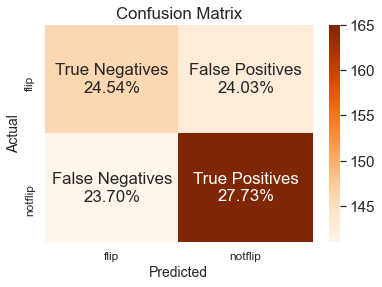

In [40]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm_4, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [41]:
# create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
  Reads an image from filename, turns it into  a tensor and reshape it 
  to (img_shape, img_shape, color_Channel)
  """
  # read in the image
    img = tf.io.read_file(filename)
  # Decode the read file into a tensor
    img = tf.image.decode_image(img,channels=3)
  # resize the image
   # X_train = np.array(X_train).reshape(-1,150,150,1)
    img = tf.image.resize(img,(img_shape, img_shape))
  # rescale the image (get all value between 0 and 1)
    img = img/255.
    return img

In [42]:
test_flip = load_and_prep_image("Resources/test1.png")
test_flip

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [43]:
class_names

array(['flip', 'notflip'], dtype='<U7')

In [44]:
#pred=model_4.predict(tf.expand_dims(test_flip, axis=0))
pred=model_4.predict(test_flip)
pred

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (224, 224, 3)

In [ ]:
# we can index the predicted class by rounding the prediction probability and indexing it to class names
pred_class =class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred(model, filename, class_names=class_names):
    
    
    """
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title.
  """
  # import the target image and preprocess it
    img =load_and_prep_image(filename)

  # make a prediction
    pred= model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
    pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [ ]:
# test our model on a custom image
pred(model_4, "Resources/test1.png")